## Import Original Dataset ##


In [ ]:
import pandas as pd
working_dir = '/content/drive/MyDrive/myocardial dataset/'
data_path = '/content/drive/MyDrive/myocardial dataset/Myocardial infarction complications Database.csv'

data = pd.read_csv(data_path)
data.shape

(1700, 124)

## Visualizztion Utils ##

In [ ]:


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
def bin_piechart(a,b,c= 0.0):

    import matplotlib.pyplot as plt
    import matplotlib as mlib
    mlib.rcParams['font.size'] = 20.0 
    labels = ['0','1']
    sizes = [a,b]
    explode = (0,0.1)
    col = ['lightgreen','lightblue']
    if c != 0.0:
      labels = ['0','1','Missing']
      sizes = [a,b,c]
      explode = (0,0.1,0)
      col = ['lightgreen','lightblue','red']

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,colors = col,explode=explode,labels=labels, autopct='%1.2f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig('plot.png')


def piechart(labels = [],sizes = []):
    import matplotlib.pyplot as plt
    import matplotlib as mlib
    mlib.rcParams['font.size'] = 20.0 
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,labels=labels, autopct='%1.2f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig('plot.png')
  




In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
def numeric_report(data,variables):
  report = {'Name' : [],
            'Descrizione' :[],
            'Missing' : [],
            'Q1' : [],
            'Median' : [],
            'Q3' : [],
            'Min' : [],
            'Mean' : [],
            'Max' : [],
            'Std':[]}

  for variable in variables:
    data_values = data[variable]
    values  = values = [x for x in data_values if str(x) != 'nan']
    missing_values  =  [x for x in data_values if str(x) == 'nan']

   
    report['Name'] += [variable]
    report['Descrizione'] += [' ']

    report['Missing'] +=[len(missing_values)]
    report['Q1'] += [np.quantile(values,0.25)]
    report['Median'] += [np.quantile(values,0.50)]
    report['Q3'] += [np.quantile(values,0.75)]
    report['Min'] += [np.min(values)]
    report['Mean'] += [np.mean(values)]
    report['Max'] += [np.min(values)]
    report['Std'] += [np.std(values)]
  
  return pd.DataFrame(data = report )
 
    



"""
data_values = data.D_AD_KBRIG
values  = values = [x for x in data_values if str(x) != 'nan']
missing_values  =  [x for x in data_values if str(x) == 'nan']


fig = plt.figure(figsize =(10, 7))

print(f'Missing values : {len(missing_values)}')
print(f'Q1 : {np.quantile(values,0.25)}')
print(f'Median: {np.quantile(values,0.50)}')
print(f'Q3 : {np.quantile(values,0.75)}')
print(f'Min: {np.min(values)}')
print(f'Mean : {np.mean(values)}')
print(f'Max : {np.max(values)}')
print(f'Std : {np.std(values)}')






# Creating plot
plt.boxplot(values)
plt.title(data.S_AD_KBRIG.name)
 
# show plot
plt.show()

"""

numeric_report(data, ['AGE','S_AD_KBRIG','D_AD_KBRIG','S_AD_ORIT','D_AD_ORIT','N_BLOOD','ALT_BLOOD','AST_BLOOD','KFK_BLOOD','L_BLOOD','ROE']).to_markdown()

'|    | Name       | Descrizione   |   Missing |     Q1 |   Median |     Q3 |    Min |       Mean |    Max |       Std |\n|---:|:-----------|:--------------|----------:|-------:|---------:|-------:|-------:|-----------:|-------:|----------:|\n|  0 | AGE        |               |         8 |  54    |    63    |  70    |  26    |  61.857    |  92    | 11.2566   |\n|  1 | S_AD_KBRIG |               |      1076 | 120    |   140    | 160    |   0    | 136.907    | 260    | 34.9698   |\n|  2 | D_AD_KBRIG |               |      1076 |  70    |    80    |  90    |   0    |  81.3942   | 190    | 19.7292   |\n|  3 | S_AD_ORIT  |               |       267 | 120    |   130    | 150    |   0    | 134.588    | 260    | 31.3374   |\n|  4 | D_AD_ORIT  |               |       267 |  80    |    80    |  90    |   0    |  82.7495   | 190    | 18.3147   |\n|  5 | NA_BLOOD   |               |       375 | 133    |   136    | 140    | 117    | 136.551    | 169    |  6.50966  |\n|  6 | ALT_BLOOD  |            

In [ ]:
#!pip install markdown-figure
#!pip install markdown-embedimages


def get_markdonw_img_code():
  import mei.embed_images
  import mistune

  renderer = mei.embed_images.EmbedImagesRenderer(embed_local_images=True)
  m = mistune.Markdown(renderer=renderer)
  markdown = "![alt text](/content/plot.png)"
  actual = m.render(markdown)
  return actual


def is_binary(X):
  if len(np.unique(X)) == 2:
    return True
  return False


def bin_report(data,variables = []):
  if len(variables) == 0:
    variables = data.columns
  
  report = {'Name' : [],
            'Description' :[],
            '1:Positive Values': [],
            '0:Negative Values':[],
            'Missings' : [],
            'Pie' : []
            }

  for variable in variables:
    
    data_values = data[variable]
    N = len(data_values)
    values  = [x for x in data_values if str(x) != 'nan']
    
    if not is_binary(values):
      continue

    ones = len([x for x in values if x == 1])/N
    zeros = len([x for x in values if x == 0])/N
    
    missing_values  =  len([x for x in data_values if str(x) == 'nan'])/N
    
    bin_piechart(zeros,ones,missing_values)
    cd = get_markdonw_img_code()

    report['Name'] += [variable]
    report['Description'] += [' ']
    report['0:Negative Values'] += [f'{round(zeros*100,2)}%']
    report['1:Positive Values'] += [f'{round(ones*100,2)}%']
    report['Missings'] += [f'{round(missing_values*100,2)}%']
    report['Pie'] += [cd]

  return pd.DataFrame(data = report )
 






bin_report(data).to_markdown()


In [ ]:
def ordinal_report(data, exlusion= ['AGE','S_AD_KBRIG','D_AD_KBRIG','S_AD_ORIT','D_AD_ORIT','N_BLOOD','ALT_BLOOD','AST_BLOOD','KFK_BLOOD','L_BLOOD','ROE']):
  report = {'Name' : [],
            'Description' :[],
            'Values': [],
            'Pie' : []
            }

  for variable in data.columns:
    
    data_values = data[variable]
    N = len(data_values)
    values  = [x for x in data_values if str(x) != 'nan']
    missing_values  =  len([x for x in data_values if str(x) == 'nan'])/N

    if not is_binary(values) and variable not in exlusion:
      unique_val = []
      unique_size = []
      if missing_values > 0:
        unique_val += ['missing_values']
        unique_size += [missing_values]


      for value in np.unique(values):
        unique_val += [str(value)]
        unique_size += [len([x for x in values if x == value])/N]

        

      piechart(labels =unique_val,sizes = unique_size )

      cd = get_markdonw_img_code()
      if 'missing_values' in unique_val :
        unique_val.remove('missing_values')
      report['Name'] += [variable]
      report['Description'] += [' ']
      report['Values'] += [unique_val]
      report['Pie'] += [cd]

  return pd.DataFrame(data = report )
 
ordinal_report(data).to_markdown()

In [ ]:

values = data.NOT_NA_3_n
mv = len([x for x in values if str(x) == 'nan'])
print(f'missing values :{mv}')
values.hist()


## **Data Cleaning**

### Missing Data Histogram 
<p> Questo istogramma aiuta a identificare le situazioni di valori mancanti tra le  osservazioni.</p>

created missing indicator for: AGE
created missing indicator for: INF_ANAM
created missing indicator for: STENOK_AN
created missing indicator for: FK_STENOK
created missing indicator for: IBS_POST
created missing indicator for: IBS_NASL
created missing indicator for: GB
created missing indicator for: SIM_GIPERT
created missing indicator for: DLIT_AG
created missing indicator for: ZSN_A
created missing indicator for: nr_11
created missing indicator for: nr_01
created missing indicator for: nr_02
created missing indicator for: nr_03
created missing indicator for: nr_04
created missing indicator for: nr_07
created missing indicator for: nr_08
created missing indicator for: np_01
created missing indicator for: np_04
created missing indicator for: np_05
created missing indicator for: np_07
created missing indicator for: np_08
created missing indicator for: np_09
created missing indicator for: np_10
created missing indicator for: endocr_01
created missing indicator for: endocr_02
created mis

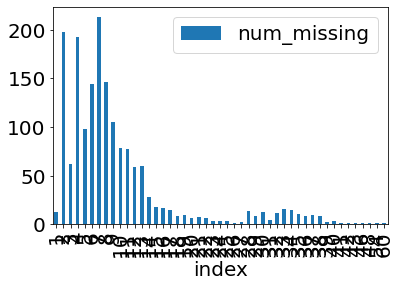

In [ ]:
#Missing Data for Column
import numpy as np

missing_indicators_data = pd.DataFrame()
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        missing_indicators_data['{}_ismissing'.format(col)] = missing

# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in missing_indicators_data.columns if 'ismissing' in col]
missing_indicators_data['num_missing'] = missing_indicators_data[ismissing_cols].sum(axis=1)

missing_indicators_data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [ ]:
pct_missing = dict()
for col in data.columns:
    pct_missing[col] = np.mean(data[col].isnull())
    
ordered  = dict(sorted(pct_missing.items(), key=lambda item: item[1]))


for (col,percent_missing) in ordered.items():
  if percent_missing*100 > 0.0:
    print('{} - {}%'.format(col, round(percent_missing*100)))

### Drop Points and Features

In [ ]:
cleaned_data = data.drop(columns = ['GIPO_K','K_BLOOD','GIPER_NA','S_AD_KBRIG','NA_BLOOD','NA_KB','LID_KB','NOT_NA_KB','D_AD_KBRIG','IBS_NASL','KFK_BLOOD'])

index_to_delete = []
missing_thresh = 20
for (index,row)  in enumerate(cleaned_data.values):
    
     n_missings = len([x for x in row if str(x) == 'nan'])
     #print(f'{index} : {n_missings}')
     if (n_missings > missing_thresh ):
       index_to_delete += [index]


print(len(index_to_delete))

cleaned_data = cleaned_data.drop(index = index_to_delete )
cleaned_data


130


,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,...,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.38,0.18,7.8,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.30,0.11,10.8,NaN,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.37,NaN,NaN,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.45,0.22,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,1695,77.0,0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.23,0.18,5.5,20.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,3
1695,1696,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.05,0.52,12.8,6.0,2.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1
1698,1699,79.0,0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.45,0.45,7.5,4.0,2.0,1.0,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1


### Sostituzione del valore mancante con il valore più probabile
 
Per prevedere il valore più probabile sulla base delle altre informazioni presenti nel dataset si è scelto di utilizzare il metodo Nearest Neighbour Imputation. 
 
I valori mancanti di ogni campione sono imputati utilizzando il valore medio di dei K vicini più vicini trovati nel dataset. Due osservazioni sono vicine se le feature  che non mancano a nessuno dei due sono vicine, è stato settato un numero di vicini K = 3.


In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
cleaned_data_imputed = round(pd.DataFrame(imputer.fit_transform(cleaned_data),columns = cleaned_data.columns))
cleaned_data_imputed


,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,...,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1.0,77.0,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,52.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,10.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,68.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,16.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,60.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,1695.0,77.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,20.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
1566,1696.0,77.0,0.0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
1567,1697.0,70.0,0.0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1568,1699.0,79.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1

### Data Scaling
Considerando solo  le variabili numeriche del Dataset ('AGE','S_AD_ORIT','D_AD_ORIT','ALT_BLOOD','L_BLOOD','K_BLOOD','ROE')
, si normalizzano i valori delle variabili mediante una normalizzazione Z-score


In [ ]:
from sklearn.preprocessing import StandardScaler
"""
numeric_features = ['AGE','S_AD_ORIT','D_AD_ORIT','ALT_BLOOD','L_BLOOD','ROE']
numerics = cleaned_data_imputed[numeric_features]
std_scaler = StandardScaler()
std_scaler

df_std = pd.DataFrame(std_scaler.fit_transform(numerics), columns=numerics.columns)

for X in numeric_features:
  cleaned_data_imputed[X] = df_std[X]

"""

values = cleaned_data_imputed.LET_IS 


binary_values = []
for value in values:
  binary_values += [ 1 if value > 0.0 else  0]

cleaned_data_imputed['LET_IS'] = binary_values


cleaned_data_imputed


,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,...,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1.0,77.0,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2.0,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3.0,52.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,10.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4.0,68.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,16.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,5.0,60.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,1695.0,77.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,20.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1566,1696.0,77.0,0.0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1567,1697.0,70.0,0.0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1568,1699.0,79.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0

Al termine di questo fase di preprocessing si esportano i dati in formato CSV.

In [ ]:
cleaned_data_imputed.to_csv(working_dir + 'cleaned_data_multilabel.csv',index=False)

dataframe = pd.read_csv(working_dir + 'cleaned_data_multilabel.csv').drop(columns = ['ID'])
dataframe

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,...,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1.0,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,52.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,10.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,68.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,16.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,60.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,77.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,20.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1566,77.0,0.0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,13.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1567,70.0,0.0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1568,79.0,0.0,2.0,2.0,2.0,1.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.0,70.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,4.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0

## **Multi-Label -> Multi-Class**

In [ ]:
import pandas as pd
import numpy as np
working_dir = '/content/drive/MyDrive/myocardial dataset/'

cleaned_data_multilabel = pd.read_csv(working_dir + 'cleaned_data_multilabel.csv').drop(columns = ['ID'])
X = cleaned_data_multilabel.iloc[:,:100]
y = cleaned_data_multilabel.iloc[:,100:]
print(y)
y_new = []
"""
for y_i in y.values:
  complications = list(y_i[:-2]).count(1) > 0
  dead = y_i[-1] == 1

  if not complications:
    y_new += [0]
  else :
    y_new += [1]

y_new = pd.DataFrame(data = {'COMP': y_new})
"""
y_new = y.iloc[:,0]
print(y_new)
print(np.unique(y_new))

pd.concat([X,y_new],axis= 1).to_csv(working_dir + 'cleaned_data_multiclass.csv',index=False)


      FIBR_PREDS  PREDS_TAH  JELUD_TAH  ...  REC_IM  P_IM_STEN  LET_IS
0            0.0        0.0        0.0  ...     0.0        0.0       0
1            0.0        0.0        0.0  ...     0.0        0.0       0
2            0.0        0.0        0.0  ...     0.0        0.0       0
3            0.0        0.0        0.0  ...     0.0        0.0       0
4            0.0        0.0        0.0  ...     0.0        0.0       0
...          ...        ...        ...  ...     ...        ...     ...
1565         0.0        0.0        0.0  ...     0.0        0.0       1
1566         0.0        0.0        0.0  ...     0.0        0.0       1
1567         0.0        0.0        0.0  ...     0.0        0.0       1
1568         0.0        0.0        0.0  ...     0.0        0.0       1
1569         0.0        0.0        0.0  ...     0.0        0.0       1

[1570 rows x 12 columns]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1565    0.0
1566    0.0
1567    0.0
1568    0.0
15

## Modeling

In [ ]:
import numpy as np                                # For data management
import pandas as pd                               # For data management

import seaborn as sns                             # For data visualization and specifically for pairplot()
import matplotlib.pyplot as plt                   # For data visualization
import math
from sklearn import datasets                      # To import the sample dataset
from sklearn.preprocessing import StandardScaler  # To transform the dataset
              # To instantiate, train and use model
from sklearn import metrics  
working_dir = '/content/drive/MyDrive/myocardial dataset/'
data_path = '/content/drive/MyDrive/myocardial dataset/Myocardial infarction complications Database.csv'


dataframe = pd.read_csv(working_dir + 'cleaned_data_multilabel.csv').drop(columns = ['ID'])
X = dataframe.iloc[:,0:100]
#X = dataframe[['AGE','S_AD_ORIT','D_AD_ORIT','ALT_BLOOD','L_BLOOD','K_BLOOD','ROE']]
y_true = dataframe.iloc[:,100:]

SEED = 42

no_comp = []
for data_point_idx,values in enumerate(y_true.values):
  #print(values)
 
  no_comp += [1 if (list(values).count(1) == 0) else 0 ] 

y_true['NO_COMP'] = no_comp


# ==================FACTOR ANALYSIS============================================
# https://www.datacamp.com/community/tutorials/introduction-factor-analysis
#! pip install factor_analyzer
from factor_analyzer  import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
print(f'KMO  : {kmo_model}')

"""

"""


# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()

fa.fit(X)
eigen_values, vectors = fa.get_eigenvalues()

pritnt(f'eigenvalues : {eigen_values}')# 32 eigevalues> 1.0


n_factors = 32
fa.set_params(n_factors= n_factor, rotation='varimax')
X_transformed = fa.fit_transform(X)
columns = []
for i in range(n_factors):
  columns += [f'FACTOR_{i+1}']

X_transformed = pd.DataFrame(data = X_transformed,columns = columns)

print(y_true)
X_transformed

KMO  : 0.5148399492387826
      FIBR_PREDS  PREDS_TAH  JELUD_TAH  ...  P_IM_STEN  LET_IS  NO_COMP
0            0.0        0.0        0.0  ...        0.0       0        1
1            0.0        0.0        0.0  ...        0.0       0        1
2            0.0        0.0        0.0  ...        0.0       0        1
3            0.0        0.0        0.0  ...        0.0       0        0
4            0.0        0.0        0.0  ...        0.0       0        1
...          ...        ...        ...  ...        ...     ...      ...
1565         0.0        0.0        0.0  ...        0.0       1        0
1566         0.0        0.0        0.0  ...        0.0       1        0
1567         0.0        0.0        0.0  ...        0.0       1        0
1568         0.0        0.0        0.0  ...        0.0       1        0
1569         0.0        0.0        0.0  ...        0.0       1        0

[1570 rows x 13 columns]


/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


,FACTOR_1,FACTOR_2,FACTOR_3,FACTOR_4,FACTOR_5,FACTOR_6,FACTOR_7,FACTOR_8,FACTOR_9,FACTOR_10,FACTOR_11,FACTOR_12,FACTOR_13,FACTOR_14,FACTOR_15,FACTOR_16,FACTOR_17,FACTOR_18,FACTOR_19,FACTOR_20,FACTOR_21,FACTOR_22,FACTOR_23,FACTOR_24,FACTOR_25,FACTOR_26,FACTOR_27,FACTOR_28,FACTOR_29,FACTOR_30,FACTOR_31,FACTOR_32,Cluster
0,1.018804,1.570729,-1.324752,0.027325,-0.528604,1.636386,0.154354,1.425560,-0.254859,-0.118049,2.255158,-0.690108,-0.282419,-0.142095,-0.210687,-0.117875,0.073907,-0.142395,-0.401540,-0.734467,-0.644399,-0.106395,0.424792,0.054184,0.128614,3.976495,-1.181843,0.464714,-0.994168,-0.274344,0.080027,-0.841595,6
1,0.501394,-0.203103,-0.059955,-0.889456,1.031908,-0.587871,0.045895,-1.140102,0.063670,-0.832015,-0.173961,-0.288247,-0.473618,-0.120670,-0.170578,-0.138422,0.096406,0.015899,0.145310,-0.471537,0.151358,-0.177315,1.426083,0.672387,-0.144668,0.175254,-0.345752,0.243697,0.033969,-0.203001,-0.454094,-0.813857,6
2,0.792432,-0.071030,0.125107,-0.788451,0.945195,-0.558791,0.052869,0.636841,5.365046,-0.952476,-0.717382,-0.653184,2.721603,-0.056887,0.042084,-0.004243,-0.043495,0.139763,-0.587232,-0.594263,-0.713406,-0.015335,0.325019,-0.488905,1.511355,-0.156170,-0.024896,-0.462745,-0.300467,-0.302667,1.374486,0.326781,11
3,-0.864330,-0.340201,0.004116,-0.915971,-0.500582,-0.719209,-0.215480,0.771132,-0.166788,0.524695,2.172758,-0.563025,-0.392198,-0.163593,0.109103,-0.079912,-0.065868,-0.038805,-0.209177,-0.016972,-1.002998,0.162428,-0.953400,-0.153846,0.273935,0.320216,-0.330754,0.165681,-0.088066,-0.570338,-0.465897,-0.620615,6
4,0.318191,-0.212402,-0.210086,-0.908660,1.129015,1.881531,-0.044853,1.566384,-0.363744,-0.176537,-0.113097,-0.112157,-0.567035,-0.068385,-0.213902,0.034548,-0.086612,0.007495,-0.189792,-0.392995,0.036740,-0.323561,-0.443777,-0.478656,-0.127447,-0.129169,-0.191554,-0.220303,0.074070,-0.029371,-0.420303,-0.189709,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,0.281779,-0.119844,-0.177482,-1.176258,1.171371,-0.940670,0.051007,0.407719,0.932554,1.245755,-0.501261,-0.119376,-0.581349,-0.201889,-0.304450,-0.068186,0.015828,-0.148541,0.976649,-0.515403,1.119846,0.037804,-0.114997,-0.000112,-0.264100,-0.494624,-0.053956,-0.042665,-0.367572,0.516728,-0.440522,-0.064493,6
1566,-0.968391,-0.313833,-0.247613,0.459548,1.303703,-1.065434,-0.131169,0.673417,-0.335374,1.289260,-0.078086,-0.553787,-0.566796,0.076114,-0.169617,-0.087616,-0.074078,-0.344205,-0.600265,2.076646,1.298227,-0.286497,0.384260,-0.326663,-0.159902,-0.327583,-0.130631,0.098661,1.725676,0.487799,-0.103837,-0.314833,6
1567,-5.111510,-0.608766,-0.242467,0.820892,-0.990212,-1.031667,-0.533773,1.184815,-0.358746,1.056473,-0.158760,-0.323662,-0.338008,-0.210405,0.108982,-0.263627,-0.449215,-0.131616,-0.655764,-0.045066,0.614289,0.075542,0.913006,0.027052,-0.288351,-0.417153,0.097873,-0.522966,-0.543793,0.432478,0.644834,0.160572,6
1568,-0.864161,4.282580,1.501033,0.137641,1.011304,-0.273384,0.105123,0.479847,-0.220766,0.551787,-0.270210,-0.447064,1.496068,-0.098829,-0.636141,-0.538300,0.077938,-0.361958,0.591546,-0.908346,-0.433327,0.204174,0.669821,1.303801,0.282270,0.086948,-0.218805,0.170418,-0.163148,-0.322742,-0.851682,-0.106647,4


### OC index

      FACTOR_1  FACTOR_2  FACTOR_3  ...  FACTOR_31  FACTOR_32  Cluster
0     1.018804  1.570729 -1.324752  ...   0.080027  -0.841595        0
1     0.501394 -0.203103 -0.059955  ...  -0.454094  -0.813857        0
2     0.792432 -0.071030  0.125107  ...   1.374486   0.326781        0
3    -0.864330 -0.340201  0.004116  ...  -0.465897  -0.620615        0
4     0.318191 -0.212402 -0.210086  ...  -0.420303  -0.189709        0
...        ...       ...       ...  ...        ...        ...      ...
1565  0.281779 -0.119844 -0.177482  ...  -0.440522  -0.064493        0
1566 -0.968391 -0.313833 -0.247613  ...  -0.103837  -0.314833        0
1567 -5.111510 -0.608766 -0.242467  ...   0.644834   0.160572        0
1568 -0.864161  4.282580  1.501033  ...  -0.851682  -0.106647        0
1569 -5.222406 -0.221521  0.097072  ...   0.204020  -0.028051        3

[1570 rows x 33 columns]
Number of Cluster 2, Method : manhattan, Score : 0.20705192174672782
Number of Cluster 2, Method : cosine, Score : 0.22233

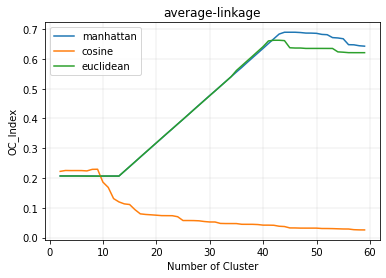

In [ ]:
import pandas as pd
import numpy as np




def cluster_intersection(c_i,c_j):
  
  intersection_counts = 0
  for (x_i,x_j) in zip(c_i,c_j) :
    #print(data_point_idx)
    if(x_i == x_j) and x_i == 1:
        intersection_counts += 1
    
  
  
  return intersection_counts
  
def count_objects(cluster_solution):
  n,m = cluster_solution.shape
  unique, counts = np.unique(cluster_solution, return_counts=True)
  return dict(zip(unique, counts))[1]


def p_tilde(cluster_solution):
  cluster_solution = np.array(cluster_solution)
  k = cluster_solution.shape[1]
  N = cluster_solution.shape[0]
  p_value = 0
  for i in range(k):
    len_c_i = list(cluster_solution[:,i]).count(1)
    p_value += len_c_i * (len_c_i - 1)

  denominator = k*N*(N-1)
  return p_value/denominator
    

def t_tilde(clustering_a,clustering_b):
  clustering_a = np.array(clustering_a)
  clustering_b = np.array(clustering_b)

  # n_a e n_b resent the number of objects 
  # that can be counted in solutions considering every overlap
  n_a = count_objects(clustering_a) 
  n_b = count_objects(clustering_b)

  N = clustering_a.shape[0]
  M_a = clustering_a.shape[1]
  M_b = clustering_b.shape[1]

  t_value = 0
  for i in range(M_a):
       for j in range(M_b):
         c_ij = cluster_intersection(clustering_a[:,i],clustering_b[:,j])
         P_ij =  c_ij *(c_ij -1) 
         t_value +=  P_ij

  denominator = (N*(N -1)) *(max(n_a,n_b)/ N) * min(M_a,M_b)
       
  
  return t_value/denominator


def OC_index(clustering_a,clustering_b):
  return (t_tilde(clustering_a,clustering_b)) / (max(p_tilde(clustering_a),p_tilde(clustering_b)))


#!pip install scikit-learn-extra

#==================================================================

#from sklearn_extra.cluster import KMedoids

from sklearn.cluster import KMeans,MiniBatchKMeans,AgglomerativeClustering



def OC_Search(X,y_true,linkage_methods = [], min_k = 2,max_k = 40,step = 1,verbose=True):
  print(X)
  import matplotlib.pyplot as plt
  scores = dict()
  ks = []
  for linkage_method in linkage_methods:
    scores[linkage_method] = []
  for k in range(min_k,max_k,step):
    ks += [k]
    for linkage_method in linkage_methods:
      y_pred =  AgglomerativeClustering(n_clusters = k,affinity = linkage_method ,linkage = METHOD).fit(X).labels_
    
      cluster_solution = pd.DataFrame(data = {'cluster' : y_pred})
      y_pred = pd.get_dummies(cluster_solution.cluster,prefix='C')
      score = OC_index(y_true,y_pred)
      if verbose:
        print(f'Number of Cluster {k}, Method : {linkage_method}, Score : {score}')
      scores[linkage_method] += [score]

  scores_method = dict()
  for linkage_method in linkage_methods:
    scores_method[linkage_method] = []
    for score in scores[linkage_method]:
      scores_method[linkage_method] += [score]
  
    plt.plot(ks,scores_method[linkage_method],label = linkage_method )
    
  
  plt.title(f'{METHOD}-linkage')
 
  plt.xlabel('Number of Cluster')
  plt.ylabel('OC_Index')
  plt.legend()
  plt.grid( linestyle='-', linewidth=0.2)
  plt.show()





#============================main================================


METHOD = 'average'

OC_Search(X_transformed,y_true,linkage_methods = ['manhattan','cosine','euclidean'],min_k = 2,max_k=60)






###GINI e PURITY

Number of Cluster 2, Method : manhattan, Score : 0.4
Number of Cluster 2, Method : cosine, Score : 0.4
Number of Cluster 2, Method : euclidean, Score : 0.4
Number of Cluster 32, Method : manhattan, Score : 0.4140127388535032
Number of Cluster 32, Method : cosine, Score : 0.4012738853503185
Number of Cluster 32, Method : euclidean, Score : 0.4159235668789809
Number of Cluster 62, Method : manhattan, Score : 0.43248407643312103
Number of Cluster 62, Method : cosine, Score : 0.4063694267515924
Number of Cluster 62, Method : euclidean, Score : 0.43439490445859874
Number of Cluster 92, Method : manhattan, Score : 0.44522292993630574
Number of Cluster 92, Method : cosine, Score : 0.41464968152866244
Number of Cluster 92, Method : euclidean, Score : 0.4439490445859873
Number of Cluster 122, Method : manhattan, Score : 0.4636942675159236
Number of Cluster 122, Method : cosine, Score : 0.42165605095541403
Number of Cluster 122, Method : euclidean, Score : 0.4585987261146497
Number of Cluster 15

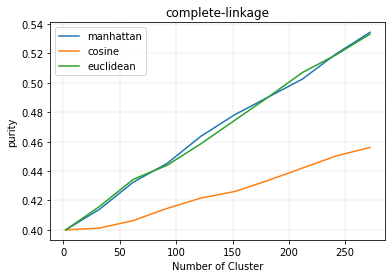

In [ ]:
def k_Search(X,y_true,score_fn,linkage_methods = [], min_k = 2,max_k = 40,step = 1,verbose=True):
  import matplotlib.pyplot as plt
  scores = dict()
  ks = []
  for linkage_method in linkage_methods:
    scores[linkage_method] = []
  for k in range(min_k,max_k,step):
    ks += [k]
    for linkage_method in linkage_methods:
      y_pred =  AgglomerativeClustering(n_clusters = k,affinity = linkage_method,linkage = METHOD).fit(X).labels_
      y_pred = pd.get_dummies(y_pred,prefix='C')
      complications_for_cluster = dict()

      for cluster_i in y_pred.columns:
        complications_for_cluster[cluster_i] = []
        data_points_idxs = np.where( y_pred[cluster_i] == 1)[0]
        
        for  idx in data_points_idxs:
          complications_for_idx = []
          for complication in y_true.columns:
            if y_true[complication][idx] == 1:
              complications_for_idx += [complication]
          
          complications_for_cluster[cluster_i] += [str(tuple(complications_for_idx))]

      for cluster_i in complications_for_cluster.keys():
        unique, counts = np.unique(complications_for_cluster[cluster_i], return_counts=True)
        complications_for_cluster[cluster_i] = dict(zip(unique, counts))


      ConfusionMatrix = pd.DataFrame(data = complications_for_cluster).fillna(0)



      score = score_fn(ConfusionMatrix)
      if verbose:
        print(f'Number of Cluster {k}, Method : {linkage_method}, Score : {score}')
      scores[linkage_method] += [score]

  scores_method = dict()
  for linkage_method in linkage_methods:
    scores_method[linkage_method] = []
    for score in scores[linkage_method]:
      scores_method[linkage_method] += [score]
  
    plt.plot(ks,scores_method[linkage_method],label = linkage_method )
    
  
  plt.title(f'{METHOD}-linkage')
 
  plt.xlabel('Number of Cluster')
  plt.ylabel(f'{score_label}')
  plt.legend()
  plt.grid( linestyle='-', linewidth=0.2)
  plt.show()

def Gini(ConfusionMatrix,cluster):
  N = sum(ConfusionMatrix[cluster])
  P_j = 0
  for i in range(ConfusionMatrix.shape[0]):
    m_ij = ConfusionMatrix[cluster][i]
    P_j += (m_ij/N)**2
  return 1 - P_j


def GiniAvg(ConfusionMatrix):
  Gini_Index = 0
  Den = 0
  for cluster_j in ConfusionMatrix.columns:
    Gini_Index += Gini(ConfusionMatrix,cluster_j)*sum(ConfusionMatrix[cluster_j])
  
  for cluster_j in ConfusionMatrix.columns:
    Den += sum(ConfusionMatrix[cluster_j])
  return Gini_Index/Den


def Purity(ConfusionMatrix,cluster):
  N = sum(ConfusionMatrix[cluster])
  P_j = []
  for i in range(ConfusionMatrix.shape[0]):
    m_ij = ConfusionMatrix[cluster][i]
    P_j += [m_ij]
  return max(P_j)


def PurityAvg(ConfusionMatrix):
  Gini_Index = 0
  Den = 0
  for cluster_j in ConfusionMatrix.columns:
    Gini_Index += Purity(ConfusionMatrix,cluster_j)
  
  for cluster_j in ConfusionMatrix.columns:
    Den += sum(ConfusionMatrix[cluster_j])
  return Gini_Index/Den


METHOD = 'complete'
score_label = 'purity'

k_Search(X_transformed,y_true,PurityAvg,linkage_methods = ['manhattan','cosine','euclidean'],min_k = 2,step= 30,max_k=300)

### BUILD MODEL

MODEL OUTPUT
completeLinkage, Affinity : manhattan, n_clusters : 300
OC_INDEX :  0.05143168624712069
C_0 size : 256 labels : {'A_V_BLOK': 3, 'DRESSLER': 6, 'FIBR_JELUD': 5, 'FIBR_PREDS': 11, 'JELUD_TAH': 1, 'LET_IS': 10, 'NO_COMP': 131, 'OTEK_LANC': 5, 'PREDS_TAH': 1, 'P_IM_STEN': 24, 'RAZRIV': 2, 'REC_IM': 20, 'ZSN': 37}
C_1 size : 115 labels : {'A_V_BLOK': 1, 'DRESSLER': 3, 'FIBR_PREDS': 7, 'LET_IS': 11, 'NO_COMP': 36, 'OTEK_LANC': 12, 'PREDS_TAH': 3, 'P_IM_STEN': 11, 'RAZRIV': 3, 'REC_IM': 9, 'ZSN': 19}
C_2 size : 20 labels : {'DRESSLER': 1, 'FIBR_JELUD': 2, 'FIBR_PREDS': 3, 'JELUD_TAH': 1, 'LET_IS': 4, 'NO_COMP': 2, 'OTEK_LANC': 2, 'PREDS_TAH': 1, 'P_IM_STEN': 1, 'RAZRIV': 1, 'ZSN': 2}
C_3 size : 184 labels : {'A_V_BLOK': 3, 'DRESSLER': 6, 'FIBR_JELUD': 2, 'FIBR_PREDS': 12, 'JELUD_TAH': 3, 'LET_IS': 8, 'NO_COMP': 63, 'OTEK_LANC': 15, 'PREDS_TAH': 2, 'P_IM_STEN': 24, 'RAZRIV': 2, 'REC_IM': 9, 'ZSN': 35}
C_4 size : 4 labels : {'OTEK_LANC': 1, 'P_IM_STEN': 1, 'ZSN': 2}
C_5 size : 5 la

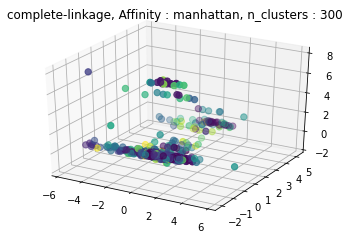

In [ ]:

K = 300
Linkage = 'complete'
affinity = 'manhattan'

y_predicted =  AgglomerativeClustering(n_clusters= K ,affinity = affinity ,linkage = Linkage).fit(X_transformed).labels_
    
cluster_solution = pd.DataFrame(data = {'cluster' : y_predicted})
y_pred = pd.get_dummies(cluster_solution.cluster,prefix='C')
score = OC_index(y_true,y_pred)

print('MODEL OUTPUT')
print('==================================================================')

print(f'{Linkage}Linkage, Affinity : {affinity}, n_clusters : {K}')

print(f'OC_INDEX :  {score}')


complications_for_cluster = dict()
 


for cluster_i in y_pred.columns:
  complications_for_cluster[cluster_i] = []
  data_points_idxs = np.where( y_pred[cluster_i] == 1)[0]
  
  for  idx in data_points_idxs:
    complications_for_idx = []
    for complication in y_true.columns:
      if y_true[complication][idx] == 1:
        complications_for_idx += [complication]
    
    complications_for_cluster[cluster_i] += complications_for_idx

for cluster_i in complications_for_cluster.keys():
  unique, counts = np.unique(complications_for_cluster[cluster_i], return_counts=True)
  complications_for_cluster[cluster_i] = dict(zip(unique, counts))



for c_i in complications_for_cluster:
  size = 0
  for labels,count in complications_for_cluster[c_i].items():
    size += count

  print(f'{c_i} size : {size} labels : {complications_for_cluster[c_i]}')


X_transformed['Cluster'] = y_predicted

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_title(label = f'{Linkage}-linkage, Affinity : {affinity}, n_clusters : {K}')
x = np.array(X_transformed['FACTOR_1'])
y = np.array(X_transformed['FACTOR_2'])
z = np.array(X_transformed['FACTOR_3'])

ax.scatter(x,y,z, c=X_transformed["Cluster"], s=40)

plt.show()

## Frequent Pattern Mining, Apriori

In [ ]:
!pip install efficient_apriori

In [ ]:
from efficient_apriori import apriori
"""
transactions = [('eggs', 'bacon', 'soup'),
                ('eggs', 'bacon', 'apple'),
                ('soup', 'bacon', 'banana')]
itemsets, rules = apriori(transactions, min_support=0.1, min_confidence=1)
print(rules)  # [{eggs} -> {bacon}, {soup} -> {bacon}]
"""

def get_binary_variabile_indexs(data):
  binary_idx = []
  for (idx,col) in enumerate(data.columns):
    if len(np.unique(data[col])) > 2:
      continue
    binary_idx += [idx]
  return binary_idx


def transaction_format(data):
  transactions = []

  for transaction_idx in range(len(data)):
    itemset  = []
    for item in data.columns:
      #print(f'transaction_idx {transaction_idx} item {item}')
      if data.iloc[transaction_idx][item] == 1:
        itemset += [item]
    transactions += [tuple(itemset)]
  return transactions

working_dir = '/content/drive/MyDrive/myocardial dataset/'
data_path = '/content/drive/MyDrive/myocardial dataset/Myocardial infarction complications Database.csv'


dataframe = pd.read_csv(working_dir + 'cleaned_data_multilabel.csv').drop(columns = ['ID'])

binary_idxs = get_binary_variabile_indexs(dataframe)
binary_data = dataframe.iloc[:,binary_idxs]
binary_data

transactions = transaction_format(binary_data)
transactions

binary_data.shape


(1570, 84)

In [ ]:
def all_itemsets(itemsets):
  itemsets_ = []
  for itemset_k in itemsets.values():
    for itemset,support in itemset_k.items():
      itemsets_ += [itemset]
  return itemsets_





def AprioriSearch(transaction,step = 1):
  import matplotlib.pyplot as plt
  n_pattern = []
  minsup_values = []
  minconf= 0.9
  for i in range(1,100,step):
    minsup = i/100
    itemsets, rules = apriori(transactions, min_support=minsup, min_confidence = minconf)
    n_pattern += [len(all_itemsets(itemsets))]
    minsup_values += [minsup]


  plt.plot(minsup_values,n_pattern)
  plt.xlabel('minsup')
  plt.ylabel('n patterns')
  plt.ylim((0.0,300))
  plt.legend()
  plt.grid( linestyle='-', linewidth=0.2)
  plt.show()
  



AprioriSearch(transactions)

In [ ]:

itemsets, rules = apriori(transactions, min_support=0.15, min_confidence = 0.70)


itemsets_table_data = {'frequent pattern' : [], 'support' : []}

for itemset_k in itemsets.values():
  for itemset,support in itemset_k.items():
    itemsets_table_data['frequent pattern'] += [ f' { itemset}']
    itemsets_table_data['support'] += [f'{support}']



pd.DataFrame(itemsets_table_data).to_markdown()




